In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

print("=== CUSTOMER SEGMENTATION USING K-MEANS ===")

=== CUSTOMER SEGMENTATION USING K-MEANS ===


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("Dataset uploaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Saving Mall_Customers.csv to Mall_Customers (2).csv
Dataset uploaded successfully!
Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print("=== DATA PREPROCESSING ===")

# Correct feature names
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Verify features exist
print("Available columns:", df.columns.tolist())
print("Selected features:", features)

# Extract and scale features
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original data shape: {X.shape}")
print(f"Scaled data shape: {X_scaled.shape}")
print("Data preprocessing completed! ✓")

=== DATA PREPROCESSING ===
Available columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Selected features: ['Annual Income (k$)', 'Spending Score (1-100)']
Original data shape: (200, 2)
Scaled data shape: (200, 2)
Data preprocessing completed! ✓


=== ELBOW METHOD ===


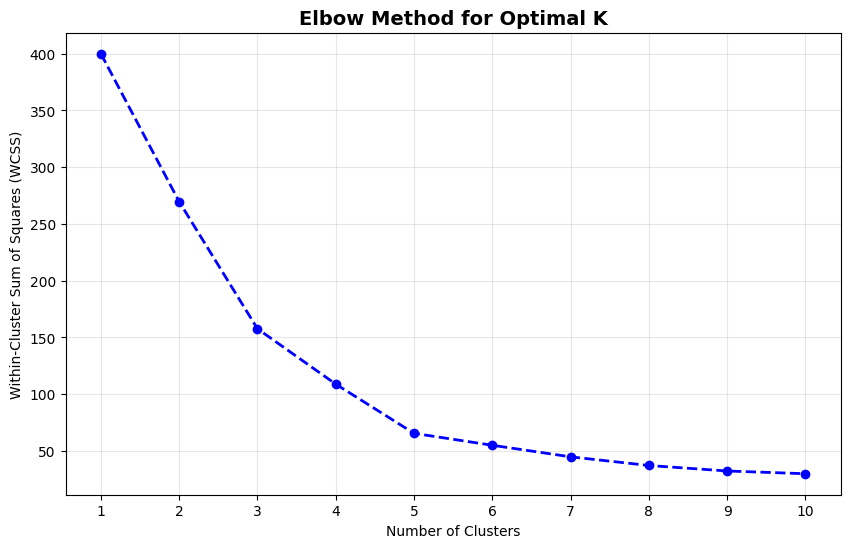

WCSS Values:
Clusters: 1, WCSS: 400.00
Clusters: 2, WCSS: 269.69
Clusters: 3, WCSS: 157.70
Clusters: 4, WCSS: 108.92
Clusters: 5, WCSS: 65.57
Clusters: 6, WCSS: 55.06
Clusters: 7, WCSS: 44.86
Clusters: 8, WCSS: 37.23
Clusters: 9, WCSS: 32.39
Clusters: 10, WCSS: 29.98


In [ ]:
print("=== ELBOW METHOD ===")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue', linewidth=2)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3)
plt.show()

print("WCSS Values:")
for i, val in enumerate(wcss, 1):
    print(f"Clusters: {i}, WCSS: {val:.2f}")

In [ ]:
print("=== APPLYING K-MEANS ===")

optimal_k = 5  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering completed!")
print("\nCluster distribution:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

=== APPLYING K-MEANS ===
Clustering completed!

Cluster distribution:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)


=== CLUSTER VISUALIZATION ===


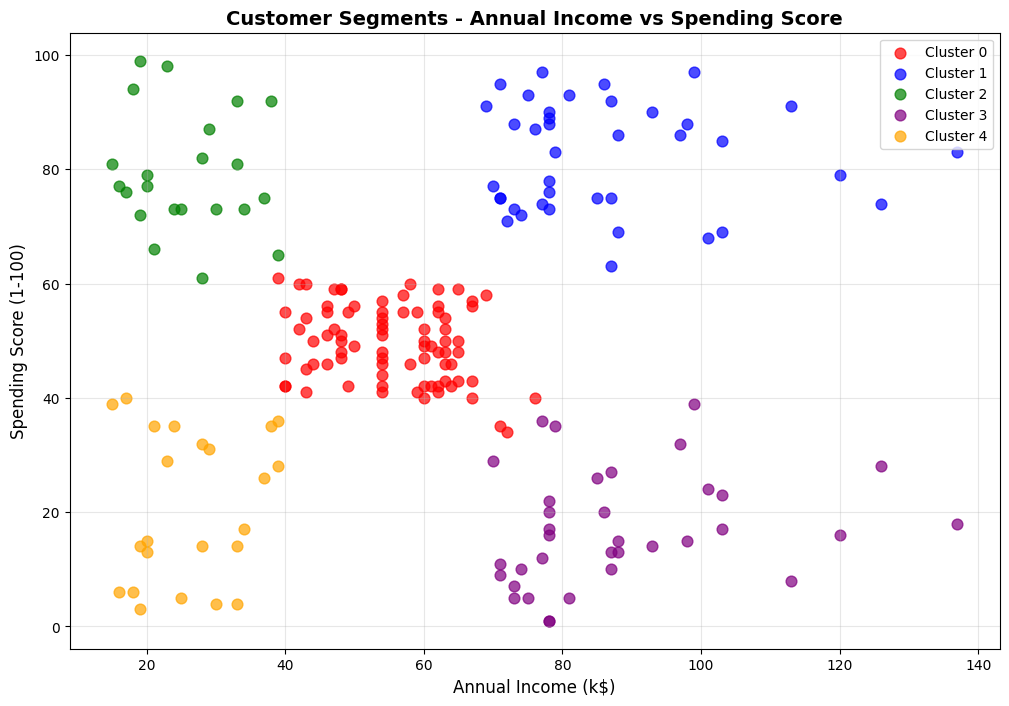

In [ ]:
# Step 6: Visualize Clusters - CORRECTED
print("=== CLUSTER VISUALIZATION ===")

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7, s=60)

plt.title('Customer Segments - Annual Income vs Spending Score', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("=== CLUSTER ANALYSIS ===")

# Detailed cluster analysis
cluster_summary = df.groupby('Cluster').agg({
    features[0]: ['count', 'mean', 'std', 'min', 'max'],
    features[1]: ['mean', 'std', 'min', 'max']
}).round(2)

print("Cluster Summary:")
print(cluster_summary)
print("\n" + "="*50)

# Customer count per cluster
print("\nCustomers per Cluster:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

=== CLUSTER ANALYSIS ===
Cluster Summary:
        Annual Income (k$)                        Spending Score (1-100)  \
                     count   mean    std min  max                   mean   
Cluster                                                                    
0                       81  55.30   8.99  39   76                  49.52   
1                       39  86.54  16.31  69  137                  82.13   
2                       22  25.73   7.57  15   39                  79.36   
3                       35  88.20  16.40  70  137                  17.11   
4                       23  26.30   7.89  15   39                  20.91   

                        
           std min max  
Cluster                 
0         6.53  34  61  
1         9.36  63  97  
2        10.50  61  99  
3         9.95   1  39  
4        13.02   3  40  


Customers per Cluster:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.

In [ ]:
print("=== CUSTOMER PROFILES ===")

profiles = []
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]

    profile = {
        'Cluster': cluster,
        'Size': len(cluster_data),
        'Percentage': (len(cluster_data) / len(df)) * 100,
        f'Avg_{features[0]}': cluster_data[features[0]].mean(),
        f'Avg_{features[1]}': cluster_data[features[1]].mean(),
        'Income_Range': f"{cluster_data[features[0]].min():.0f}-{cluster_data[features[0]].max():.0f}",
        'Spending_Range': f"{cluster_data[features[1]].min():.0f}-{cluster_data[features[1]].max():.0f}"
    }
    profiles.append(profile)

profiles_df = pd.DataFrame(profiles)
print(profiles_df.round(2))

print("\n" + "="*50)
print("BUSINESS INTERPRETATION:")
print("="*50)

# Business interpretation
interpretations = {
    0: "Medium Income, Medium Spending - Average Customers",
    1: "High Income, Low Spending - Conservative Spenders",
    2: "Low Income, Low Spending - Budget-Conscious",
    3: "Low Income, High Spending - Carefree Spenders",
    4: "High Income, High Spending - Premium Customers"
}

for cluster in range(optimal_k):
    print(f"Cluster {cluster}: {interpretations.get(cluster, 'Need analysis')}")

=== CUSTOMER PROFILES ===
   Cluster  Size  Percentage  Avg_Annual Income (k$)  \
0        0    81        40.5                   55.30   
1        1    39        19.5                   86.54   
2        2    22        11.0                   25.73   
3        3    35        17.5                   88.20   
4        4    23        11.5                   26.30   

   Avg_Spending Score (1-100) Income_Range Spending_Range  
0                       49.52        39-76          34-61  
1                       82.13       69-137          63-97  
2                       79.36        15-39          61-99  
3                       17.11       70-137           1-39  
4                       20.91        15-39           3-40  

BUSINESS INTERPRETATION:
Cluster 0: Medium Income, Medium Spending - Average Customers
Cluster 1: High Income, Low Spending - Conservative Spenders
Cluster 2: Low Income, Low Spending - Budget-Conscious
Cluster 3: Low Income, High Spending - Carefree Spenders
Cluster 4: High 

=== CLUSTER COMPARISON ===


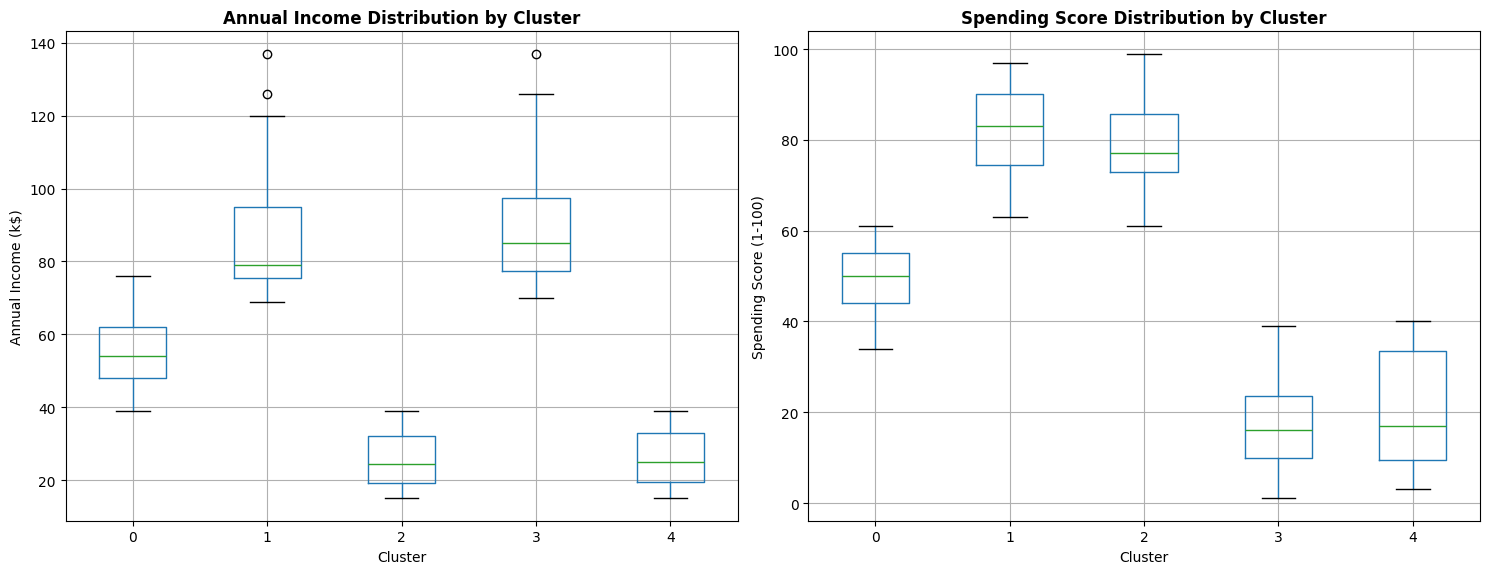

In [ ]:
print("=== CLUSTER COMPARISON ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Annual Income by Cluster
df.boxplot(column='Annual Income (k$)', by='Cluster', ax=axes[0])
axes[0].set_title('Annual Income Distribution by Cluster', fontweight='bold')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_xlabel('Cluster')

# Plot 2: Spending Score by Cluster
df.boxplot(column='Spending Score (1-100)', by='Cluster', ax=axes[1])
axes[1].set_title('Spending Score Distribution by Cluster', fontweight='bold')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_xlabel('Cluster')

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

In [ ]:
print("=== SAVING RESULTS ===")

# Save the clustered data
df.to_csv('Mall_Customers_Clustered.csv', index=False)

# Download the results
files.download('Mall_Customers_Clustered.csv')

print("Clustered dataset saved and downloaded!")

=== SAVING RESULTS ===


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Clustered dataset saved and downloaded!
